In [14]:
from eulers_method import *
import matplotlib.pyplot as plt
import numpy as np

# Euler Solution Example

Consider the problem of the cooling of an object, Newtons rule of cooling tells us that an object starting at the temperature $T_0$ such that $T(0) = T_0$. 

$$\frac{dT}{dt} = \alpha (T-T_s)$$

Where $T_s$ is the temperature of the objects surroundings, T(t) is the temperature of that object at time t and $\alpha <0$ is a constant of proportionality, since the rate of cooling is proportional to the difference of the object temperature and the surrounding temperature.

We next integrate both sides w.r.t time.

$$
\begin{align*}
\int^{t}_{0}\frac{1}{\alpha (T-T_s)} \frac{dT}{dt} dt =\int^{t}_{0}dt \\
\int^{t}_{0}\frac{1}{(T-T_s)} dT = \alpha t \\
\ln{|T-T_s|-\ln{|T_0-T_s|}} = \alpha t \\
\ln{\frac{|T-T_s|}{|T_0-T_s|}} = \alpha t \\
\frac{|T-T_s|}{|T_0-T_s|} = e^{\alpha t} \\
|T-T_s| = |T_0-T_s|e^{\alpha t}
\end{align*}
$$

`Case 1`: if we assume that $T_0 > T_s$ and that $T(t) \geq T_s$ then $T = T_s + (T_0 - T_s) e^{\alpha t}$

`Case 2`: if we assume that $T_0 < T_s$ and that $T(t) \leq T_s$ then $T = T_s - (T_s - T_0) e^{\alpha t} $

`Case 3`: In this case we have that $T_0 = T_s$ then the object is at room temperature thus $T = T_s$ is constant

In [15]:
alpha = -1 

In [16]:
initial_temperature_1 = 28
surrounding_temperature_1 = 20

In [17]:
initial_temperature_2 = 12
surrounding_temperature_2 = 20

In [18]:
endpoint = 10
steps = 1000

# Analytical Solution



In [19]:
def case1(time,surrounding_temperature = surrounding_temperature_1,alpha = alpha ,T_0 = initial_temperature_1):
    return surrounding_temperature + (T_0 - surrounding_temperature) * np.exp(alpha * time)

In [20]:
def case2(time,surrounding_temperature = surrounding_temperature_2,alpha = alpha,T_0 = initial_temperature_2):
    return  - (surrounding_temperature - T_0) * np.exp(alpha * time) + surrounding_temperature

In [21]:
space = np.arange(0,endpoint,endpoint/steps)

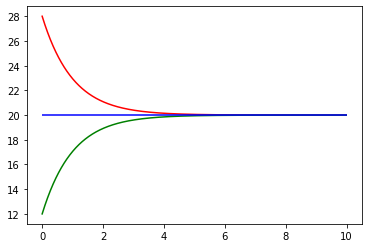

In [22]:
plt.plot(space,case1(space),color = 'red')
plt.plot(space,case2(space),color = 'green')
plt.hlines(y = surrounding_temperature_1,xmin = 0,xmax = endpoint, color = 'blue')

# Numerical Solution

In [23]:
def law_of_cooling(T:float,y:float,surrounding_temperature:float,alpha:float) -> float:
    if alpha > 0:
        raise TypeError("Alpha must be negative.")
    return alpha * (T - surrounding_temperature)

In [24]:
x_1,y_1 = euler_method(
    lambda x,y: law_of_cooling(y,x,surrounding_temperature_1,alpha=alpha),
    [0,initial_temperature_1],
    endpoint,
    steps
)

In [25]:
x_2,y_2 = euler_method(
    lambda x,y: law_of_cooling(y,x,surrounding_temperature_2,alpha=alpha),
    [0,initial_temperature_2],
    endpoint,
    steps
)

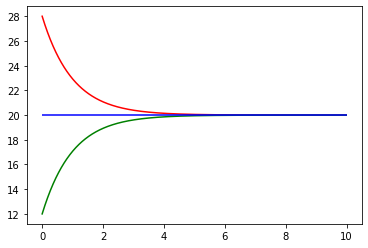

In [26]:
plt.plot(x_1,y_1,color = 'red',label = "")
plt.plot(x_2,y_2,color = 'green',label = "")
plt.hlines(y = surrounding_temperature_1,xmin = 0,xmax = endpoint, color = 'blue')

# Second Order Example

Consider the physical system of a mass on a string on a smooth surface. It is logical to think that as the mass is pulled further from the strings natural length it feels a stronger force pulling it back, in other words $F \propto - x$ as the force will always act in the opposite direction to the pulling.

Newtons second law tells us that $F = ma$ but accelaration is nothing but the second time derivative of position, hence $a = \frac{d^2x}{dt^2}$ thus we have:

$$
\begin{align*}
\frac{d^2x}{dt^2} \propto -x
\end{align*}
$$

We know this `coefficient of proportionality` to be $\frac{k}{m}$ where $k$ is the `spring constant` (determines how 'springy' the spring is) and $m$ is the mass of the block.

$$
\begin{align*}
\frac{d^2x}{dt^2} = - \frac{k}{m} x
\end{align*}
$$

Analytically we can solve this equation pretty easily, by substituting $x = e^{\lambda t}$ and solving for $\lambda$.

$$
\begin{align*}
\lambda^2 e^{\lambda t}= - \frac{k}{m} e^{\lambda t} \\
\lambda ^2 = -\frac{k}{m} \\
\lambda = \pm i \sqrt{\frac{k}{m}}  
\end{align*}
$$
So we can now get our general solution for arbritrary constants $A,B$ that will be determined via `auxilary equations`:
$$
\begin{align*}
x(t) = Ae^{i \sqrt{\frac{k}{m}}t} + Be^{-i \sqrt{\frac{k}{m}}t}
\end{align*}
$$

We only care about $\Re(x(t))$, hence our general solution with some more arbitrary constants is:
$$
\begin{align*}
x(t) = \tilde{A} \cos{(\sqrt{\frac{k}{m}}t}) + \tilde{B} \sin({-\sqrt{\frac{k}{m}}t})
\end{align*}
$$
Now our `auxillary equations` shall be $\left . \frac{d^2x}{dt^2} \right|_{t=0}= -x_0$ and $\frac{dx}{dt} = 0$

In [ ]:
def spring_system(x,k,m):
    return - k*x/m